# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [22]:
print('x = {}, y = {}'.format(X[0], Y[0]))

x = 3.3, y = 1.7


In [33]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
#    print('linear_regression x={}, y_val = {}'.format(x, W * x + b) )
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
#    print('mean_square value yp {} yt {} sq {}'.format(y_pred, y_true, tf.square(y_pred - y_true)))
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [18]:
print(rng.randn())

-0.04951025913014008


In [47]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    print(X)
    print(pred)
    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    print(gradients)
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [34]:
pred = linear_regression(X)
loss = mean_square(pred, Y)
print(" loss: %f, W: %f, b: %f" % ( loss, W.numpy(), b.numpy()))

 loss: 50.630074, W: -0.591563, b: -0.773784


In [48]:
run_optimization()

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]
tf.Tensor(
[1.6286802 1.9056284 2.182577  2.48722   2.5426097 1.8472176 3.2599058
 2.3542848 2.7087786 1.3434234 2.570808  3.5146983 2.1354957 2.8112495
 2.2213495 3.1317544 1.578326 ], shape=(17,), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=3.3333898e-05>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0002344884>]


In [43]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.153869, W: 0.253010, b: 0.789054
step: 100, loss: 0.153867, W: 0.252852, b: 0.790169
step: 150, loss: 0.153865, W: 0.252713, b: 0.791157
step: 200, loss: 0.153863, W: 0.252590, b: 0.792032
step: 250, loss: 0.153862, W: 0.252480, b: 0.792807
step: 300, loss: 0.153861, W: 0.252384, b: 0.793493
step: 350, loss: 0.153860, W: 0.252298, b: 0.794100
step: 400, loss: 0.153860, W: 0.252222, b: 0.794638
step: 450, loss: 0.153859, W: 0.252155, b: 0.795115
step: 500, loss: 0.153859, W: 0.252095, b: 0.795537
step: 550, loss: 0.153859, W: 0.252043, b: 0.795910
step: 600, loss: 0.153858, W: 0.251996, b: 0.796241
step: 650, loss: 0.153858, W: 0.251955, b: 0.796534
step: 700, loss: 0.153858, W: 0.251918, b: 0.796793
step: 750, loss: 0.153858, W: 0.251886, b: 0.797023
step: 800, loss: 0.153858, W: 0.251857, b: 0.797227
step: 850, loss: 0.153858, W: 0.251832, b: 0.797407
step: 900, loss: 0.153858, W: 0.251809, b: 0.797566
step: 950, loss: 0.153858, W: 0.251789, b: 0.797708
step: 1000, l

In [40]:
import matplotlib.pyplot as plt

In [39]:
#!pip install matplotlib

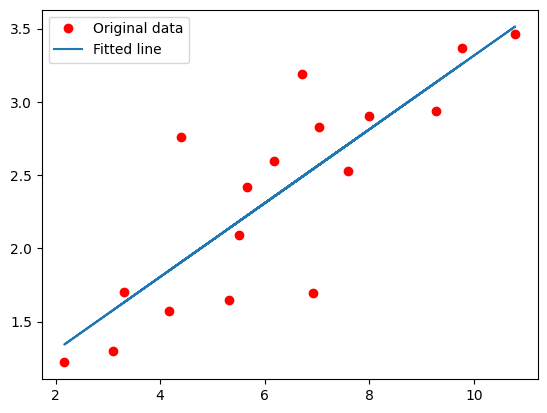

In [44]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()